In [6]:
import sys
import os

# Add the parent directory (project root) to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Randomness

## JAX

In [1]:
from general_python.algebra.utils import get_backend as __backend
from general_python.algebra.ran_wrapper import uniform, randint
# test random
seed    = None
backend = 'np'
for i in range(5):
    modules = __backend(backend, random=True, seed=seed)
    backend, (rnd_module, key) = modules if isinstance(modules, tuple) else (modules, (None, None))
    print(f"backend: {backend}")
    print(f"key: {key}")
    print(f"rnd_module: {rnd_module}")
    print(f"rnd_module.random(): {rnd_module.random()}")
    print(f"rnd_module.randint(0, 10): {rnd_module.integers(0, 10)}")
    print(f"rnd_module.uniform(0, 10): {rnd_module.uniform(0, 10)}")
    print(f"rnd_module.normal(0, 1): {rnd_module.normal(0, 1)}")
    # take the function from random wrapper
    print(f"uniform(0, 10): {uniform(shape=(5,),minval=0, maxval=10, backend=backend, seed=seed)}")
    print()

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===
backend: <module 'numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/numpy/__init__.py'>
key: None
rnd_module: Generator(PCG64)
rnd_module.random(): 0.22733602246716966
rnd_module.randint(0, 10): 7
rnd_module.uniform(0, 10): 7.973654573327341
rnd_module.normal(0, 1): -0.2591732349343976
uniform(0, 10): [3.91109551 3.32813928 5.98308754 1.86734186 6.7275604

# Models

## Operators Test with all backends

In [1]:
from general_python.lattices.honeycomb import HoneycombLattice
from general_python.lattices.lattice import LatticeBC
import general_python.common.binary as bin_mod
import numpy as np

backend = 'np'
lat     = HoneycombLattice( dim     = 2,
                            lx      = 2,
                            ly      = 2,
                            lz      = 1,
                            bc      = LatticeBC.PBC)
lat

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


HON,LatticeBC.PBC,d=2,Ns=8,Lx=2,Ly=2,Lz=1

### Local operators test

In [2]:
# create an operator
import Algebra.Operator.operators_spin as op_spin
import jax.numpy as jnp

sig_x = op_spin.sig_x(
    lattice  = lat,
    type_act = op_spin.OperatorTypeActing.Local
)
sig_z = op_spin.sig_z(
    lattice  = lat,
    type_act = op_spin.OperatorTypeActing.Local
)

# create a set of states and test it
int_state = np.random.randint(0, 2**lat.ns, dtype=np.int32)
np_state  = np.ones((lat.ns), dtype = np.float64)
jnp_state = jnp.ones((lat.ns), dtype = jnp.float64)

int_state, np_state, jnp_state

(226,
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 DeviceArray([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float64))

#### Integer states

In [3]:
print(f"Before: {bin_mod.int2binstr(int_state, lat.ns)}")
for i in range(lat.ns):
    print(f"i: {i})")
    print("\tSigma Z")
    # sig_z
    int_state_mod, int_state_mod_val = sig_z(int_state, i)
    print(f"\t\tAfter {i}'th s_z: ({int_state_mod[0]})b{bin_mod.int2binstr(int_state_mod[0], lat.ns)} with value {int_state_mod_val}")
    print("\tSigma X")
    # sig_x
    int_state_mod, int_state_mod_val = sig_x(int_state, i)
    print(f"\t\tAfter {i}'th s_x: ({int_state_mod[0]})b{bin_mod.int2binstr(int_state_mod[0], lat.ns)} with value {int_state_mod_val}")

Before: 11100010
i: 0)
	Sigma Z
		After 0'th s_z: (226)b11100010 with value [0.5]
	Sigma X
		After 0'th s_x: (98)b01100010 with value [0.5]
i: 1)
	Sigma Z
		After 1'th s_z: (226)b11100010 with value [0.5]
	Sigma X
		After 1'th s_x: (162)b10100010 with value [0.5]
i: 2)
	Sigma Z
		After 2'th s_z: (226)b11100010 with value [0.5]
	Sigma X
		After 2'th s_x: (194)b11000010 with value [0.5]
i: 3)
	Sigma Z
		After 3'th s_z: (226)b11100010 with value [-0.5]
	Sigma X
		After 3'th s_x: (242)b11110010 with value [0.5]
i: 4)
	Sigma Z
		After 4'th s_z: (226)b11100010 with value [-0.5]
	Sigma X
		After 4'th s_x: (234)b11101010 with value [0.5]
i: 5)
	Sigma Z
		After 5'th s_z: (226)b11100010 with value [-0.5]
	Sigma X
		After 5'th s_x: (230)b11100110 with value [0.5]
i: 6)
	Sigma Z
		After 6'th s_z: (226)b11100010 with value [0.5]
	Sigma X
		After 6'th s_x: (224)b11100000 with value [0.5]
i: 7)
	Sigma Z
		After 7'th s_z: (226)b11100010 with value [-0.5]
	Sigma X
		After 7'th s_x: (227)b11100011 with 

#### Numpy states

In [5]:
for i in range(lat.ns):
    print(f"i: {i})")
    sites            = [i]
    np_modified_x, _ = sig_x(np_state.copy(), sites[0])
    np_modified_z, _ = sig_z(np_state.copy(), sites[0])
    print(f"Before: {np_state}, acting on sites {sites}")
    print(f"After X: {np_modified_x}")
    print(f"After Z: {np_modified_z}")

i: 0)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0]
After X: [-1.  1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 1)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [1]
After X: [ 1. -1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 2)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [2]
After X: [ 1.  1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 3)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [3]
After X: [ 1.  1.  1. -1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 4)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [4]
After X: [ 1.  1.  1.  1. -1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 5)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [5]
After X: [ 1.  1.  1.  1.  1. -1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 6)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [6]
After X: [ 1.  1.  1.  1.  1.  1. -1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 7)
Before: [1. 1. 1. 1. 

#### Jax states

In [9]:
for i in range(lat.ns):
    print(f"i: {i})")
    sites            = [i]
    jnp_modified_x, _ = sig_x(jnp_state.copy(), sites[0])
    jnp_modified_z, _ = sig_z(jnp_state.copy(), sites[0])
    print(f"Before: {jnp_state}, acting on sites {sites}")
    print(f"After X: {jnp_modified_x}")
    print(f"After Z: {jnp_modified_z}")

i: 0)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0]
After X: [-1.  1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 1)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [1]
After X: [ 1. -1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 2)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [2]
After X: [ 1.  1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 3)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [3]
After X: [ 1.  1.  1. -1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 4)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [4]
After X: [ 1.  1.  1.  1. -1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 5)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [5]
After X: [ 1.  1.  1.  1.  1. -1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 6)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [6]
After X: [ 1.  1.  1.  1.  1.  1. -1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 7)
Before: [1. 1. 1. 1. 

### Correlation

In [10]:
# create an operator
import Algebra.Operator.operators_spin as op_spin
import jax.numpy as jnp

sig_x = op_spin.sig_x(
    lattice  = lat,
    type_act = op_spin.OperatorTypeActing.Correlation
)
sig_z = op_spin.sig_z(
    lattice  = lat,
    type_act = op_spin.OperatorTypeActing.Correlation
)

# create a set of states and test it
int_state = np.random.randint(0, 2**lat.ns, dtype=np.int32)
np_state  = np.ones((lat.ns), dtype = np.float64)
jnp_state = jnp.ones((lat.ns), dtype = jnp.float64)

int_state, np_state, jnp_state

(229,
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 DeviceArray([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float64))

#### Integer states

In [11]:
print(f"Before: {bin_mod.int2binstr(int_state, lat.ns)}")
for i in range(lat.ns):
    sites = [i, (i+1)%lat.ns]
    print(f"i: {i})")
    print("\tSigma Z")
    # sig_z
    int_state_mod, int_state_mod_val = sig_z(int_state, *sites)
    print(f"\t\tAfter {sites}'th s_z: ({int_state_mod[0]})b{bin_mod.int2binstr(int_state_mod[0], lat.ns)} with value {int_state_mod_val}")
    print("\tSigma X")
    # sig_x
    sites = [i, (i+1)%lat.ns]
    int_state_mod, int_state_mod_val = sig_x(int_state, *sites)
    print(f"\t\tAfter {sites}'th s_x: ({int_state_mod[0]})b{bin_mod.int2binstr(int_state_mod[0], lat.ns)} with value {int_state_mod_val}")

Before: 11100101
i: 0)
	Sigma Z
		After [0, 1]'th s_z: (229)b11100101 with value [0.25]
	Sigma X
		After [0, 1]'th s_x: (37)b00100101 with value [0.25]
i: 1)
	Sigma Z
		After [1, 2]'th s_z: (229)b11100101 with value [0.25]
	Sigma X
		After [1, 2]'th s_x: (133)b10000101 with value [0.25]
i: 2)
	Sigma Z
		After [2, 3]'th s_z: (229)b11100101 with value [-0.25]
	Sigma X
		After [2, 3]'th s_x: (213)b11010101 with value [0.25]
i: 3)
	Sigma Z
		After [3, 4]'th s_z: (229)b11100101 with value [0.25]
	Sigma X
		After [3, 4]'th s_x: (253)b11111101 with value [0.25]
i: 4)
	Sigma Z
		After [4, 5]'th s_z: (229)b11100101 with value [-0.25]
	Sigma X
		After [4, 5]'th s_x: (233)b11101001 with value [0.25]
i: 5)
	Sigma Z
		After [5, 6]'th s_z: (229)b11100101 with value [-0.25]
	Sigma X
		After [5, 6]'th s_x: (227)b11100011 with value [0.25]
i: 6)
	Sigma Z
		After [6, 7]'th s_z: (229)b11100101 with value [-0.25]
	Sigma X
		After [6, 7]'th s_x: (230)b11100110 with value [0.25]
i: 7)
	Sigma Z
		After [7, 0

#### Numpy states

In [12]:
for i in range(lat.ns):
    print(i)
    sites            = [i, (i+1)%lat.ns]
    np_modified_x, _ = sig_x(np_state.copy(), *sites)
    np_modified_z, _ = sig_z(np_state.copy(), *sites)
    print(f"Before: {np_state}, acting on sites {sites}")
    print(f"After X: {np_modified_x}")
    print(f"After Z: {np_modified_z}")

0
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0, 1]
After X: [-1. -1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
1
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [1, 2]
After X: [ 1. -1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
2
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [2, 3]
After X: [ 1.  1. -1. -1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
3
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [3, 4]
After X: [ 1.  1.  1. -1. -1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
4
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [4, 5]
After X: [ 1.  1.  1.  1. -1. -1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
5
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [5, 6]
After X: [ 1.  1.  1.  1.  1. -1. -1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
6
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [6, 7]
After X: [ 1.  1.  1.  1.  1.  1. -1. -1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
7
Before: [1. 1. 1. 1. 1. 1. 1. 1.

#### JAX states

In [14]:
for i in range(lat.ns):
    print(i)
    sites            = [i, (i+1)%lat.ns]
    jnp_modified_x, _ = sig_x(jnp_state.copy(), *sites)
    jnp_modified_z, _ = sig_z(jnp_state.copy(), *sites)
    print(f"Before: {jnp_state}, acting on sites {sites}")
    print(f"After X: {jnp_modified_x}")
    print(f"After Z: {jnp_modified_z}")

0
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0, 1]
After X: [-1. -1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
1
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [1, 2]
After X: [ 1. -1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
2
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [2, 3]
After X: [ 1.  1. -1. -1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
3
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [3, 4]
After X: [ 1.  1.  1. -1. -1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
4
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [4, 5]
After X: [ 1.  1.  1.  1. -1. -1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
5
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [5, 6]
After X: [ 1.  1.  1.  1.  1. -1. -1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
6
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [6, 7]
After X: [ 1.  1.  1.  1.  1.  1. -1. -1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
7
Before: [1. 1. 1. 1. 1. 1. 1. 1.

### Globals

In [2]:
# create an operator
import Algebra.Operator.operators_spin as op_spin
import jax.numpy as jnp
sites = [0, 2]
sig_x = op_spin.sig_x(
    lattice  = lat,
    sites    = sites
)
sig_z = op_spin.sig_z(
    lattice  = lat,
    sites    = sites
)

# create a set of states and test it
int_state = np.random.randint(0, 2**lat.ns, dtype=np.int32)
np_state  = np.ones((lat.ns), dtype = np.float64)
jnp_state = jnp.ones((lat.ns), dtype = jnp.float64)

int_state, np_state, jnp_state

(226,
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 DeviceArray([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float64))

#### Integer states

In [3]:
int_modified_x, _ = sig_x(int_state)
int_modified_z, _ = sig_z(int_state)
print(f"Before: {bin_mod.int2binstr(int_state, lat.ns)}, acting on sites {sites}")
print(f"After X: {bin_mod.int2binstr(int_modified_x[0], lat.ns)}")
print(f"After Z: {bin_mod.int2binstr(int_modified_z[0], lat.ns)}")

Before: 11100010, acting on sites [0, 2]
After X: 01000010
After Z: 11100010


#### Numpy

In [4]:
np_modified_x, _ = sig_x(np_state.copy())
np_modified_z, _ = sig_z(np_state.copy())
print(f"Before: {np_state}, acting on sites {sites}")
print(f"After X: {np_modified_x}")
print(f"After Z: {np_modified_z}")

Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0, 2]
After X: [-1.  1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]


#### JNP

In [5]:
jnp_modified_x, _ = sig_x(jnp_state.copy())
jnp_modified_z, _ = sig_z(jnp_state.copy())
print(f"Before: {jnp_state}, acting on sites {sites}")
print(f"After X: {jnp_modified_x}")
print(f"After Z: {jnp_modified_z}")

Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0, 2]
After X: [-1.  1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]


## Any Hamiltonian defined from the operators

In [1]:
import numpy as np
from Algebra import hamil
from general_python.lattices.honeycomb import HoneycombLattice
from general_python.lattices.lattice import LatticeBC
import general_python.common.binary as bin_mod

backend = 'np'
lat     = HoneycombLattice( dim     = 2,
                            lx      = 2,
                            ly      = 2,
                            lz      = 1,
                            bc      = LatticeBC.PBC)
ham     = hamil.Hamiltonian(
    hilbert_space   = None,
    is_sparse       = True,
    dtype           = np.float64,
    lattice         = lat,
    backend         = backend,
)
lat

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


HON,LatticeBC.PBC,d=2,Ns=8,Lx=2,Ly=2,Lz=1

In [2]:
import Algebra.Operator.operators_spin as op_spin
import jax.numpy as jnp
sites = [0, 2]
sig_x = op_spin.sig_x(
    lattice  = lat,
    sites    = sites
)

sig_z = op_spin.sig_z(
    lattice  = lat,
    sites    = sites
)

# create a set of states and test it
int_state = np.random.randint(0, 2**lat.ns, dtype=np.int32)
np_state  = np.ones((lat.ns), dtype = np.float64)
jnp_state = jnp.ones((lat.ns), dtype = jnp.float64)

int_state, np_state, jnp_state

(226,
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 DeviceArray([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float64))

In [3]:
# reset the Hamiltonian operators
ham.reset_operators()

# add operators to the Hamiltonian
ham.add(
    operator    = sig_x,
    multiplier  = 1.0,
    sites       = None,
    is_local    = False
)

ham.add(
    operator    = sig_z,
    multiplier  = 0.5,
    sites       = None,
    is_local    = False
)

### Integer states

In [4]:
sig_x(int_state)

(array([66]), array([0.25]))

In [5]:
sig_z(int_state)

(array([226]), array([0.25]))

In [6]:
ham.loc_energy(k = int_state, i = 0)

(array([ 66, 226]), array([0.25 , 0.125]))

### Numpy states

In [7]:
sig_x(np_state.copy())

(array([-1.,  1., -1.,  1.,  1.,  1.,  1.,  1.]), 0.25)

In [8]:
sig_z(np_state.copy())

(array([1., 1., 1., 1., 1., 1., 1., 1.]), 0.25)

In [9]:
ham.loc_energy(k = np_state.copy())

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'nonlocal_func_unpacked':[0m [1mCannot type list element type <class 'function'>
[1m
File "Algebra/hamil_energy.py", line 312:[0m
[1m    def wrapper(state: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        <source elided>
                state,
[1m                nonlocal_func_unpacked[i],
[0m                [1m^[0m[0m
[0m

### JAX states

In [4]:
sig_x(jnp_state.copy())

(DeviceArray([-1.,  1., -1.,  1.,  1.,  1.,  1.,  1.], dtype=float64),
 DeviceArray(0.25, dtype=float64, weak_type=True))

In [5]:
sig_z(jnp_state.copy())

(DeviceArray([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float64),
 DeviceArray(0.25, dtype=float64, weak_type=True))

In [6]:
ham.loc_energy(k = jnp_state.copy())

TracerIntegerConversionError: The __index__() method was called on the JAX Tracer object Traced<ShapedArray(int64[], weak_type=True)>with<DynamicJaxprTrace(level=1/1)>
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

## Heisenberg - Kitaev model

In [21]:
from Algebra.Model.Interacting.Spin.heisenberg_kitaev import HeisenbergKitaev, HEI_KIT_Z_BOND_NEI, HEI_KIT_X_BOND_NEI, HEI_KIT_Y_BOND_NEI
from general_python.lattices.honeycomb import HoneycombLattice
from general_python.lattices.lattice import LatticeBC

backend = 'np'
lat     = HoneycombLattice( dim     = 2,
                            lx      = 2,
                            ly      = 2,
                            lz      = 1,
                            bc      = LatticeBC.PBC)
lat

HON,LatticeBC.PBC,d=2,Ns=8,Lx=2,Ly=2,Lz=1

#### Printout the neighbors

In [14]:
# for i in range(lat.ns):
#     print(f"site {i}:")
#     n_nei = lat.get_nn_forward_num(i)
#     print(f"\tn_nei:{n_nei}")
    
#     for j in range(n_nei):
#         nei = lat.get_nn_forward(i, j)
#         print(f"\t\tnei {j}:\t{nei}", end='')
#         if j == HEI_KIT_Z_BOND_NEI:
#             print(f"\t\t\tbond Z")
#         elif j == HEI_KIT_Y_BOND_NEI:
#             print(f"\t\t\tbond Y")
#         elif j == HEI_KIT_X_BOND_NEI:
#             print(f"\t\t\tbond X")

#### GO!

In [22]:
hx      = 0.5
hz      = -0.3
j       = 1.0
kx      = 1.0
ky      = 1.0
kz      = 1.0
dlt     = 1.0

hamil   = HeisenbergKitaev(lattice      = lat, 
                        hilbert_space   = None, 
                        hx              = hx,
                        hz              = hz,
                        kx              = kx,
                        ky              = ky,
                        kz              = kz,
                        j               = j,
                        dlt             = dlt, 
                        dtype           = float,
                        backend         = backend)

In [23]:
hamil.build(verbose=True, use_numpy=True)
print(f"Memory:{hamil.memory_gb:.3e}gb")

Memory:6.104e-05gb


In [24]:
hamil.diagonalize(verbose=True)

(array([-6.44211693e+00, -5.92610809e+00, -5.34411037e+00, -4.76205750e+00,
        -4.45309041e+00, -4.39228435e+00, -4.26935329e+00, -4.19720199e+00,
        -4.14771635e+00, -4.13904170e+00, -4.02741320e+00, -3.95159616e+00,
        -3.88109805e+00, -3.70049653e+00, -3.60505299e+00, -3.48265996e+00,
        -3.47705959e+00, -3.46626615e+00, -3.27091704e+00, -3.25497709e+00,
        -3.13839839e+00, -3.12171530e+00, -3.11695191e+00, -3.11080783e+00,
        -3.08889167e+00, -3.06699614e+00, -3.06577808e+00, -2.85840130e+00,
        -2.78537589e+00, -2.78094245e+00, -2.77333462e+00, -2.72018788e+00,
        -2.66808075e+00, -2.66798999e+00, -2.60994032e+00, -2.60128268e+00,
        -2.58409053e+00, -2.54121064e+00, -2.50833066e+00, -2.49994427e+00,
        -2.40397998e+00, -2.37248032e+00, -2.35561307e+00, -2.34097147e+00,
        -2.32876190e+00, -2.24981481e+00, -2.21285296e+00, -2.13647581e+00,
        -2.10929097e+00, -2.03923428e+00, -1.99407335e+00, -1.96276039e+00,
        -1.9

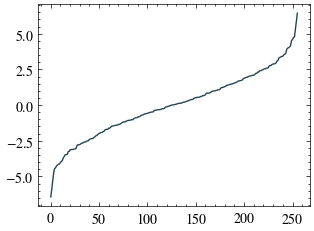

In [25]:
import matplotlib.pyplot as plt
plt.plot(hamil.eig_val)
hamil.eig_val, hamil.eig_vec, hamil.eig_vec.shape

Minimum value: -4.0
Maximum value: 5.2


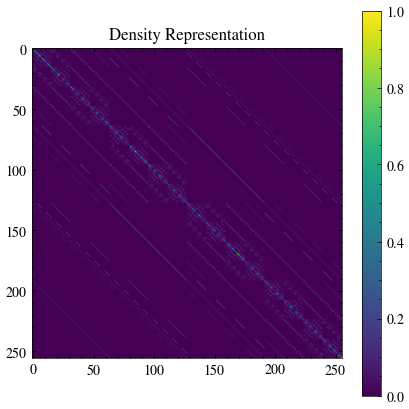

<256x256 sparse matrix of type '<class 'numpy.float64'>'
	with 5376 stored elements in Compressed Sparse Row format>

In [26]:
import numpy as np
# make dense
qsm_dense   = hamil.hamil.todense() if hamil.sparse else hamil.hamil
minimum     = qsm_dense.min()
maximum     = qsm_dense.max()
qsm_dense   = np.abs(qsm_dense) / np.abs(qsm_dense).max()

print("Minimum value:", minimum)
print("Maximum value:", maximum)

plt.figure(figsize=(5, 5))
plt.imshow(qsm_dense, cmap='viridis')
plt.colorbar()
plt.title("Density Representation")
plt.show()
hamil.hamil

## Quantum Sun Model

In [42]:
from Algebra.Model.Interacting.Spin.qsm import QSM
backend = 'np'
hamil   = QSM(ns=9, hilbert_space=None, n=3, a=0.64, h=1.0, xi=0.2, backend=backend, dtype='float64')
hamil.h

24_03_2025_01-08_38 [INFO] 	->[Quantum Sun Model] alpha = [0.640, 0.640, 0.640, 0.640, 0.640, 0.640]
24_03_2025_01-08_38 [INFO] 		->[Quantum Sun Model] u = [0.000, 0.881, 2.004, 3.148, 4.152, 5.032]
24_03_2025_01-08_38 [INFO] 		->[Quantum Sun Model] alpha^u = [1.000, 0.675, 0.409, 0.245, 0.157, 0.106]


array([1.44338755, 1.18358939, 1.45817973, 0.82950977, 0.69225829,
       0.63678877])

#### Build

##### Sparse

In [43]:
hamil.build(verbose=True, use_numpy=True)
print(f"Memory:{hamil.memory_gb:.3e}gb")

24_03_2025_01-08_39 [INFO] 	->[Quantum Sun Model] Building the Hamiltonian matrix...
24_03_2025_01-08_39 [INFO] 		->[Quantum Sun Model] Initialization completed in 0.000492 seconds
24_03_2025_01-08_39 [INFO] 	->[Quantum Sun Model] Hamiltonian matrix built in 0.069415 seconds.
24_03_2025_01-08_39 [INFO] 	->[Quantum Sun Model] Checking the memory used by the Hamiltonian matrix of type <class 'scipy.sparse._csr.csr_matrix'>
24_03_2025_01-08_39 [INFO] 		->[Quantum Sun Model] It is not a dense matrix...


Memory:8.202e-05gb


In [44]:
# print(hamil.hamil)

In [45]:
hamil.diagonalize(verbose=True)

24_03_2025_01-08_40 [INFO] [Quantum Sun Model] Diagonalization (standard) completed in 0.116838 seconds.


In [46]:
hamil.eig_val[-5:]

array([3.37383618, 3.42914556, 3.47720875, 3.75560339, 4.0732809 ])

In [ ]:
from general_python.physics.eigenlevels import gap_ratio
gap_ratio(hamil.eig_val, 1.0)['mean']

0.4454062387911004

In [50]:
np.sqrt(np.trace((hamil.hamil * hamil.hamil).todense()))

33.09106686829895

##### Dense

In [6]:
hamil.to_dense()

23_03_2025_22-34_45 [INFO] 	->[Quantum Sun Model] Converting the Hamiltonian matrix to a dense matrix... Run build...
23_03_2025_22-34_45 [INFO] 		->[Quantum Sun Model] Hamiltonian cleared...


In [12]:
hamil.build(verbose=True, use_numpy=True)

23_03_2025_21-56_00 [INFO] 	->[Quantum Sun Model] Building the Hamiltonian matrix...
23_03_2025_21-56_00 [INFO] 		->[Quantum Sun Model] Initialization completed in 0.000401 seconds
23_03_2025_21-56_01 [INFO] 	->[Quantum Sun Model] Hamiltonian matrix built in 0.064316 seconds.


In [13]:
hamil.diagonalize(verbose=True)

23_03_2025_21-56_01 [INFO] [Quantum Sun Model] Diagonalization (standard) completed in 0.091391 seconds.


In [14]:
hamil.h_memory_gb

23_03_2025_21-56_02 [INFO] 	->[Quantum Sun Model] Checking the memory used by the Hamiltonian matrix of type <class 'numpy.matrix'>


0.001953125

##### Plot tests

(array([-1.26340486, -1.2614324 , -1.21283114, -1.19720721, -1.17284135,
        -1.16790317, -1.11265135, -1.09760706, -1.08253588, -1.07783417,
        -1.05655795, -1.04787874, -1.03130445, -1.0278334 , -1.01783492,
        -1.01491076, -1.00082515, -0.99775758, -0.98656423, -0.98596698,
        -0.98040243, -0.96539039, -0.96206486, -0.95962459, -0.95725763,
        -0.95411274, -0.95300011, -0.94876289, -0.94482553, -0.94003676,
        -0.93616324, -0.93310986, -0.92612778, -0.92295966, -0.91299759,
        -0.90318615, -0.90195985, -0.89450798, -0.88297818, -0.878694  ,
        -0.87683799, -0.87346876, -0.87288868, -0.87165284, -0.86336603,
        -0.86084806, -0.85756398, -0.8570426 , -0.85668056, -0.85526978,
        -0.84311162, -0.83439275, -0.83345566, -0.83179886, -0.81943888,
        -0.81787882, -0.81772423, -0.81392277, -0.81313564, -0.80869593,
        -0.80857798, -0.80500311, -0.80143354, -0.7951546 , -0.79026772,
        -0.78238918, -0.77738747, -0.77661701, -0.7

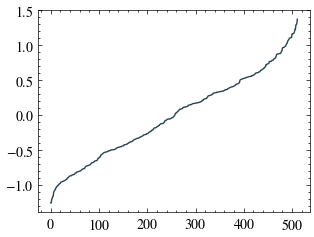

In [15]:
import matplotlib.pyplot as plt
plt.plot(hamil.eig_val)
hamil.eig_val, hamil.eig_vec, hamil.eig_vec.shape

Minimum value: -0.36581012631638304
Maximum value: 0.3636879950290463


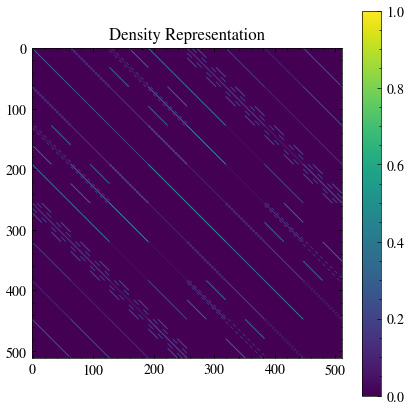

In [16]:
import numpy as np
# make dense
qsm_dense   = hamil.hamil.todense() if hamil.sparse else hamil.hamil
minimum     = qsm_dense.min()
maximum     = qsm_dense.max()
qsm_dense   = np.abs(qsm_dense) / np.abs(qsm_dense).max()

print("Minimum value:", minimum)
print("Maximum value:", maximum)

plt.figure(figsize=(5, 5))
plt.imshow(qsm_dense, cmap='viridis')
plt.colorbar()
plt.title("Density Representation")
plt.show()

##### Operators

In [4]:
from Algebra.Operator.operators_spin import sig_x, sig_z, OperatorTypeActing
from general_python.common import binary
import numpy as np

backend     = 'np'
ns          = 2
nh          = 2**ns   
sites       = [ns - 1]
# sites       = [0]
sig_x_op    = sig_x(ns = ns, type_act = OperatorTypeActing.Global, sites = sites)
sig_z_op    = sig_z(ns = ns, type_act = OperatorTypeActing.Global, sites = sites)
eye_first   = np.eye(2**(ns - 1))
eye_first

array([[1., 0.],
       [0., 1.]])

###### Check how it works on the base states

###### With states

In [3]:
int_state_full          = 2**(ns) - 1
int_state_half          = 2**(ns - 1) - 1
int_state_half_size     = 2**(ns//2) - 1

# binary representation
backend_state           = binary.int2base(int_state_full, size=ns, backend=backend)
backend_state_half      = binary.int2base(int_state_half, size=ns, backend=backend)
backend_state_half_size = binary.int2base(int_state_half_size, size=ns//2, backend=backend)
# string representation
string_state            = binary.int2binstr(int_state_full, bits=ns)
string_state_half       = binary.int2binstr(int_state_half, bits=ns)
string_state_half_size  = binary.int2binstr(int_state_half_size, bits=ns)

# act on the integer states
for state in [int_state_full, int_state_half, int_state_half_size]:
    print()
    # sigma x
    print("Applying sigma_x")
    print(f"Acting on state {state} ({binary.int2binstr(state, bits=ns)})")
    resulting_state, resulting_value = sig_x_op(state)
    print(f"\tResulting state: {resulting_state[0]}")
    print(f"\tResulting value: {resulting_value}")
    print(f"\tBinary representation of resulting state: {binary.int2binstr(resulting_state[0], bits=ns)}")
    # sigma z
    print("Applying sigma_z")
    resulting_state, resulting_value = sig_z_op(state)
    print(f"Resulting state: {resulting_state[0]}")
    print(f"Resulting value: {resulting_value}")
    print(f"Binary representation of resulting state: {binary.int2binstr(resulting_state[0], bits=ns)}")
    print()



Applying sigma_x
Acting on state 3 (11)
	Resulting state: 1
	Resulting value: [0.5]
	Binary representation of resulting state: 01
Applying sigma_z
Resulting state: 3
Resulting value: [0.5]
Binary representation of resulting state: 11


Applying sigma_x
Acting on state 1 (01)
	Resulting state: 3
	Resulting value: [0.5]
	Binary representation of resulting state: 11
Applying sigma_z
Resulting state: 1
Resulting value: [-0.5]
Binary representation of resulting state: 01


Applying sigma_x
Acting on state 1 (01)
	Resulting state: 3
	Resulting value: [0.5]
	Binary representation of resulting state: 11
Applying sigma_z
Resulting state: 1
Resulting value: [-0.5]
Binary representation of resulting state: 01



In [4]:
from Algebra.Operator.operators_spin import _SIG_X, _SIG_Z, _SIG_0

sig_x_op_mat        = sig_x_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
sig_x_op_mat_kron   = np.kron(eye_first, _SIG_X * 0.5)
sig_x_op_mat_kron   = np.kron(_SIG_X * 0.5, eye_first)
sig_z_op_mat        = sig_z_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
sig_z_op_mat_kron   = np.kron(eye_first, -_SIG_Z * 0.5)
sig_z_op_mat_kron   = np.kron(-_SIG_Z * 0.5, eye_first)

# compare the two
is_equal = np.allclose(sig_x_op_mat.todense(), sig_x_op_mat_kron)
print("Are the two matrices (sig_x) equal?", is_equal)
is_equal = np.allclose(sig_z_op_mat.todense(), sig_z_op_mat_kron)
print("Are the two matrices (sig_z) equal?", is_equal)

if nh < 64:
    from general_python.common.plot import MatrixPrinter
    print("From the operator (sig_x)")
    MatrixPrinter.print_matrix(sig_x_op_mat.todense())
    print("From the operator (sig_z)")
    MatrixPrinter.print_matrix(sig_z_op_mat.todense())
    print("From tensor (sig_x)")
    MatrixPrinter.print_matrix(sig_x_op_mat_kron)
    print("From tensor (sig_z)")
    MatrixPrinter.print_matrix(sig_z_op_mat_kron)

Are the two matrices (sig_x) equal? True
Are the two matrices (sig_z) equal? True
From the operator (sig_x)


Matrix([
[0.0, 0.0, 0.5, 0.0],
[0.0, 0.0, 0.0, 0.5],
[0.5, 0.0, 0.0, 0.0],
[0.0, 0.5, 0.0, 0.0]])

From the operator (sig_z)


Matrix([
[-0.5,  0.0, 0.0, 0.0],
[ 0.0, -0.5, 0.0, 0.0],
[ 0.0,  0.0, 0.5, 0.0],
[ 0.0,  0.0, 0.0, 0.5]])

From tensor (sig_x)


Matrix([
[0.0, 0.0, 0.5, 0.0],
[0.0, 0.0, 0.0, 0.5],
[0.5, 0.0, 0.0, 0.0],
[0.0, 0.5, 0.0, 0.0]])

From tensor (sig_z)


Matrix([
[-0.5,  0.0, 0.0, 0.0],
[ 0.0, -0.5, 0.0, 0.0],
[ 0.0,  0.0, 0.5, 0.0],
[ 0.0,  0.0, 0.0, 0.5]])

###### With Hamiltonian

###### Matrix

100%|██████████| 6/6 [00:05<00:00,  1.01it/s]


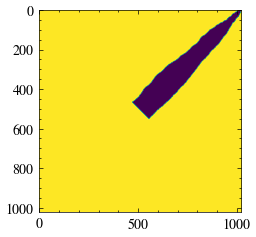

In [10]:
import numpy as np
from Algebra.Model.Interacting.Spin.qsm import QSM
from general_python.algebra.linalg import act, overlap
from general_python.common.plot import Plotter, colorsCycle
from general_python.maths.statistics import Statistics, HistogramAverage, Fraction
from Algebra.Operator.operators_spin import sig_x, sig_z, OperatorTypeActing
import matplotlib.pyplot as plt
from tqdm import tqdm

dtype           = 'float64'
nrealizations   = (np.array([100, 100, 100, 50, 30, 20])/5).astype(int)
# nrealizations   = (np.array([1, 1, 1, 1, 1, 1])).astype(int)
alpha           = 0.99
histograms_x    = {}
histograms_z    = {}
diagonals_x     = {}
diagonals_z     = {}
energies        = {}
nss             = [6,7,8,9,10]
# nss             = [10, 11]

# nss             = [9,10,11]
# nrealizations   = [10]

def set_histogram(hamiltonian, hist_sig_x: HistogramAverage, hist_sig_z: HistogramAverage, nbins):
    bandwidth       = hamiltonian.get_bandwidth()
    omax            = bandwidth * 3
    omin            = 0.1 / hamiltonian.hilbert_size
    tolerance       = 0.02 * bandwidth
    hist_sig_x.reset(nbins=nbins)
    hist_sig_x.uniform_log(v_max=omax, v_min=omin)
    hist_sig_z.reset(nbins=nbins)
    hist_sig_z.uniform_log(v_max=omax, v_min=omin)
    return tolerance

for ii, ns in enumerate(nss):
    realizations    = nrealizations[ii] if ii < len(nrealizations) else nrealizations[-1]
    energies[ns]    = []
    diagonals_x[ns] = []
    diagonals_z[ns] = []
    nh              = 2**ns
    # sites           = [0]
    sites           = [ns - 1]
    # sites           = [0]
    sig_x_op        = sig_x(ns = ns, type_act = OperatorTypeActing.Global, sites = sites)
    sig_z_op        = sig_z(ns = ns, type_act = OperatorTypeActing.Global, sites = sites)
    sig_x_op_mat    = sig_x_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
    sig_z_op_mat    = sig_z_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
    histogram_sig_x = HistogramAverage(dtype=dtype)
    histogram_sig_z = HistogramAverage(dtype=dtype)
    nbins           = int(20 * np.log2(nh))
    tolerance       = 0.0
    for realization in tqdm(range(realizations)):
        # print(f"Realization {realization + 1}/{nrealizations}")
        hamil       = QSM(ns=ns, hilbert_space=None, n=3, a=alpha, h=1.0, xi=0.2, backend = 'np', dtype='float64')
        hamil.build(verbose=False, use_numpy=True)
        hamil.diagonalize(verbose=False)
        states      = hamil.eig_vec
        eigvals     = hamil.eig_val
        sig_x_elems = overlap(states, states, sig_x_op_mat, backend = backend)
        sig_z_elems = overlap(states, states, sig_z_op_mat, backend = backend)
        diag_sig_x  = sig_x_elems.diagonal()
        diag_sig_z  = sig_z_elems.diagonal()
        if realization == 0:
            tolerance = set_histogram(hamil, histogram_sig_x, histogram_sig_z, nbins)
        # get the average energy
        energy_at       = hamil.av_en
        # create the f_functions by taking the middle spectrum (%)
        w, i_idx, j_idx = Fraction.spectral_function_fraction(eigvals, energy_at, tolerance)
        ones            = np.ones_like(sig_x_elems)
        ones[i_idx, j_idx] = 0
        plt.imshow(ones)
        # fill the histogram
        sig_x_changed   = np.abs(sig_x_elems[i_idx, j_idx])**2
        sig_z_changed   = np.abs(sig_z_elems[i_idx, j_idx])**2
        histogram_sig_x.append(w, sig_x_changed)
        histogram_sig_z.append(w, sig_z_changed)
        diagonals_x[ns].append(diag_sig_x)
        diagonals_z[ns].append(diag_sig_z)
        energies[ns].append(eigvals)
    histograms_x[ns] = histogram_sig_x
    histograms_z[ns] = histogram_sig_z
    

ns = 6, gap_ratio = 0.4930288089949947
ns = 7, gap_ratio = 0.5062694131068604
ns = 8, gap_ratio = 0.5271550080907841
ns = 9, gap_ratio = 0.5213472371127177
ns = 10, gap_ratio = 0.5066477203140601


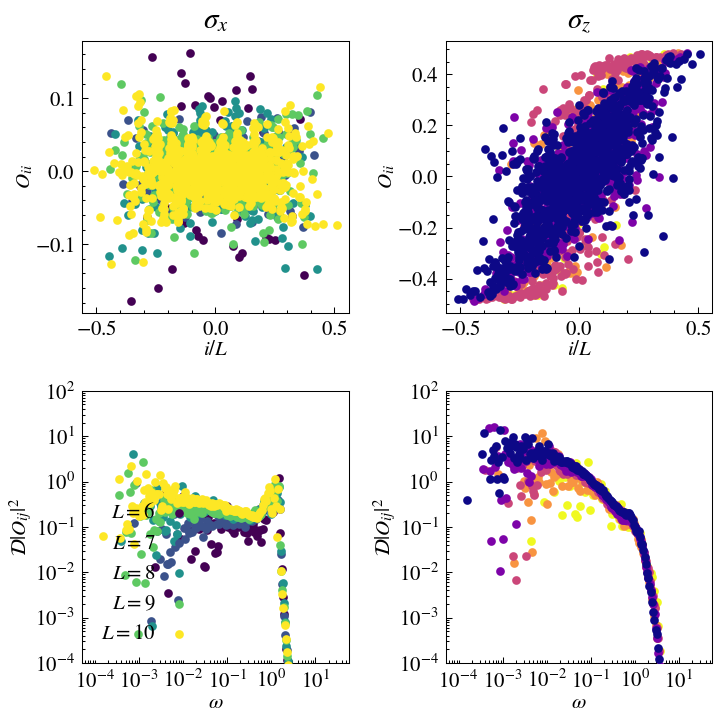

In [11]:
from general_python.physics.eigenlevels import gap_ratio
fig, ax     = Plotter.get_subplots(nrows=2, ncols=2, sizex=5, sizey=5, dpi=150)

# plot
for ii, ns in enumerate(energies.keys()):
    realizations = nrealizations[ii] if ii < len(nrealizations) else nrealizations[-1]
    nh          = 2**ns
    x           = energies[ns][0] / ns
    # x           = np.arange(nh)
    colors1, _, _= Plotter.get_colormap(nss, cmap='viridis')
    colors2, _, _= Plotter.get_colormap(nss, cmap='plasma_r')
    color1      = colors1(ns)
    color2      = colors2(ns)
    Plotter.scatter(ax[0], x, diagonals_x[ns][0], label=f'$L={ns}$', color=color1)
    Plotter.scatter(ax[1], x, diagonals_z[ns][0], label=f'$L={ns}$', color=color2)
    Plotter.set_ax_params(ax[0], xlabel='$i/L$', ylabel=r'$O_{ii}$', title=r'$\sigma_x$')
    Plotter.set_ax_params(ax[1], xlabel='$i/L$', ylabel=r'$O_{ii}$', title=r'$\sigma_z$')

    Plotter.scatter(ax[2], histograms_x[ns].bin_edges, histograms_x[ns].averages_av()*nh, label=f'$L={ns}$', color=color1)
    Plotter.scatter(ax[3], histograms_z[ns].bin_edges, histograms_z[ns].averages_av()*nh, label=f'$L={ns}$', color=color2)
    Plotter.set_ax_params(ax[2], xlabel=r'$\omega$', lim = {'y': (1e-4, 1e2)},
        ylabel=r'$\mathcal{D}|O_{ij}|^2$', scale={'x': 'log', 'y': 'log'})
    Plotter.set_ax_params(ax[3], xlabel=r'$\omega$', lim = {'y': (1e-4, 1e2)},
        ylabel=r'$\mathcal{D}|O_{ij}|^2$', scale={'x': 'log', 'y': 'log'})
    gap_ratios = [gap_ratio(energies[ns][i])['mean'] for i in range(realizations)]
    print(f"ns = {ns}, gap_ratio = {np.mean(gap_ratios)}")
    Plotter.set_legend(ax[2])
fig.tight_layout()

In [17]:

d_en = np.diff(energies[8])
d_en = d_en / np.mean(d_en)
gap_ratios = np.minimum(d_en[:-1], d_en[1:]) / np.maximum(d_en[:-1], d_en[1:])
print(np.mean(gap_ratios))


0.496256785068507


# Linear algebra

In [9]:
import general_python.algebra as algebra
a = algebra.AlgebraTests(backend='jax')
b = algebra.AlgebraTests(backend='numpy')

## Standard tests

### Change the basis with a unitary matrix

In [ ]:
a.change_basis(verbose=True)
b.change_basis(verbose=True)

### Change the basis of a matrix with a unitary matrix

In [ ]:
a.change_basis_matrix(verbose=True)

### Outer product

In [ ]:
a.outer(verbose=True)
b.outer(verbose=True)

### Kronecker product

In [ ]:
a.kron(verbose=True)

## Linear solvers

### Test through examples

In [10]:
a = algebra.SolversTests(backend='numpy')
b = algebra.SolversTests(backend='jax')

In [11]:
a.solver_test()

[TEST 0] Starting solver test using cg


ValueError: Unknown solver type: must be one of DIRECT, BACKEND_SOLVER, SCIPY_DIRECT, SCIPY_CJ, CJ, SCIPY_MINRES, MINRES, MINRES_QLP

# Binary 

### Standard tests

In [1]:
from general_python.common import binary
NUM         = 42
tests       = binary.BinaryFunctionTests()

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


23_03_2025_19-24_27 [INFO] Log file created: ./log/global.log
23_03_2025_19-24_27 [INFO] Log level set to: info
23_03_2025_19-24_27 [INFO] ########### Global logger initialized. ###########


In [2]:
import numpy as np
integer     = np.int64(255)
integer     = 255
ns          = 8
i           = 0
pos         = ns - 1 - i
checked     = binary.check_int(integer, pos)

binary.int2binstr(integer, ns), checked, (1 << pos), binary.int2binstr((1 << pos), ns), integer & (1 << pos)

('11111111', 1, 128, '10000000', 128)

In [ ]:
tests.run_tests(NUM, spin_value = binary._BACKENDREPR)

In [ ]:
tests.run_tests(NUM, spin_value = binary._BACKENDREPR, backend = 'np')

### Test JAX

In [ ]:
from algebra import get_backend
import time 
from jax import numpy as jnp, random as jnpr
import numpy as np, numpy.random as npr
from jax import jit

seed = 1701

# Test the speed of the matrix multiplication
key_np = npr.seed(seed)
key_jnp = jnpr.key(seed)
size = 5000

def matrix_mult_test_jax(size=size):
    random_mat  = jnpr.normal(key_jnp, (size, size))
    vec         = jnpr.normal(key_jnp, (size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)
    
def matrix_mult_test_numpy(size = size):
    random_mat  = npr.normal(size=(size, size))
    vec         = npr.normal(size=(size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)
    
@jit
def matrix_mult_test_jax_jit():
    random_mat  = jnpr.normal(key_jnp, (size, size))
    vec         = jnpr.normal(key_jnp, (size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)


#### Numpy

In [ ]:
start_time = time.time()
matrix_mult_test_numpy()
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds (numpy)")

#### Jax

In [ ]:
start_time = time.time()
matrix_mult_test_jax()
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds (jax)")

#### Jax jit

In [ ]:
start_time = time.time()
matrix_mult_test_jax_jit()
end_time = time.time()  
print(f"Time taken: {end_time - start_time:.4f} seconds (jax, jitted)")

# Lattice


In [ ]:
from lattices import Lattice, run_lattice_tests

# Run tests for different configurations
# run_lattice_tests(dim=1, lx=10, ly=1, lz=1, bc=lattices.LatticeBC.PBC, typek="square")
# run_lattice_tests(dim=2, lx=5, ly=3, lz=1, bc=lattices.LatticeBC.PBC, typek="square")
# run_lattice_tests(dim=2, lx=5, ly=5, lz=1, bc=lattices.LatticeBC.OBC, typek="square")
# run_lattice_tests(dim=3, lx=3, ly=3, lz=3, bc=lattices.LatticeBC.PBC, typek="square")
run_lattice_tests(dim=2, lx=3, ly=2, lz=1, bc=lattices.LatticeBC.PBC, typek="honeycomb")

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

a = 1
b = 1
c = 1

Lx = 4
Ly = 2
Ns = 2 * Lx * Ly

_a1 = np.array([np.sqrt(3) * a / 2.0, 3 * a / 2.0, 0])
_a2 = np.array([np.sqrt(3) * a / 2.0, -3 * a / 2.0, 0])
_a3 = np.array([0, 0, c])



coords      = []
move_vector = _a1 - np.array([0, a, 0])
for i in range(Ns):
    # get the unit cell on a square lattic
    x = (i // 2) % Lx
    y = ((i//2) // Lx) % Ly
    
    # from coorditates to position on the lattice
    xy = np.array([0., 0, 0]) if i % 2 == 0 else move_vector
    xy += x * (_a1 + _a2) + y * _a1
    xp, yp = xy[0], xy[1]
    print(xp, yp)
    plt.scatter(xp, yp, color='red' if i % 2 == 0 else 'blue', marker='o', s=100, facecolor='none')
    plt.text(xp + 0.1, yp + 0.1, i)
    
    print("Ns=", i, "-- (x,y)=", x, y)


plt.arrow(0, 0, _a1[0], _a1[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.arrow(0, 0, _a2[0], _a2[1], head_width=0.1, head_length=0.1, fc='b', ec='b')
# plt.arrow(0, 0, _a1[0] - _a2[0], _a1[1] - _a2[1], head_width=0.1, head_length=0.1, fc='g', ec='g')
# plt.arrow(0, 0, _a1[0] + _a2[0], _a1[1] + _a2[1], head_width=0.1, head_length=0.1, fc='y', ec='y')
# plt.arrow(0, 0, -_a1[0] + _a2[0], -_a1[1] + _a2[1], head_width=0.1, head_length=0.1, fc='m', ec='m')
# plt.arrow(0, 0, -_a1[0] - _a2[0], -_a1[1] - _a2[1], head_width=0.1, head_length=0.1, fc='c', ec='c')


# NQS

## Sampler

In [1]:
import Solver.MonteCarlo.sampler as Sampling
from general_python.algebra.utils import get_backend
from general_python.ml.net_impl.net_simple import SimpleNet

import random
import numpy as np

# get random backend
backend     = 'np'
seed        = 1701
be_modules  = get_backend(backend, random=True, seed=seed, scipy=True)
backend_np, (rng, rng_k), backend_sp = be_modules if isinstance(be_modules, tuple) else (be_modules, (None, None), None)

ns                  = 10
st_shape            = (ns, )
activations         = ('relu', 'sigmoid')
net                 = SimpleNet(act_fun =   activations, 
                        input_shape     =   st_shape, 
                        output_shape    =   (1, ),
                        layers          =   (5, ),
                        backend=backend, dtype='complex128',)
            # [random.random() + 1j * random.random() for _ in range(x.shape[0])])
# a simple callable network function

sampler = Sampling.MCSampler(
    net         = net,
    shape       = st_shape,
    rng         = rng,
    rng_k       = rng_k,
    numchains   = 10,
    numsamples  = 5,
    sweep_steps = 10,
    backend     = backend,
    therm_steps = 10,
)

sampler

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


MCSampler(shape=(10,), mu=2.0, beta=1.0, therm_steps=10, sweep_steps=10, numsamples=5, numchains=10, backend=np)

In [2]:
# check how the sampler performs
(states, logprobas), (configs, configs_ansatze), probabilities = sampler.sample()

In [3]:
# final states after sampling, ansatze after sampling
states.shape, logprobas.shape

((10, 10), (10,))

In [4]:
configs.shape, configs_ansatze.shape, probabilities.shape

((50, 10), (50, 1), (50, 1))

### Flow

#### Standard

In [ ]:
from general_python.common.plot import MatrixPrinter

print("Detailed Flow of the Configurations:\n")
print(f"  Total number of configurations: {len(configs)}")
print(f"  Total number of states: {len(states)}")
print(f"  Total number of probabilities: {len(probabilities)}\n")

for i in range(len(configs[:3])):
    print(f"--- Configuration flow {i} ---")
    print("     Configuration \\(\\mathbf{S}_{" + f"{i}" + "}\\):")
    MatrixPrinter.print_vector(configs[i])
    
    print("    Ansatz \\(f(\\mathbf{S}_{" + f"{i}" + "})\\):")
    MatrixPrinter.print_vector(configs_ansatze[i].T)
    
    print("    Probability \\(P(\\mathbf{S}_{" + f"{i}" + "})\\):")
    MatrixPrinter.print_vector(probabilities[i].T)
    print("\n" + "-" * 50 + "\n")


Detailed Flow of the Configurations:

  Total number of configurations: 10
  Total number of states: 10
  Total number of probabilities: 10

--- Configuration flow 0 ---
     Configuration \(\mathbf{S}_{0}\):


Matrix([
[-0.5,  0.5,  0.5, -0.5,  0.5, -0.5, -0.5,  0.5,  0.5,  0.5],
[ 0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5],
[ 0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5,  0.5, -0.5],
[-0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5],
[ 0.5,  0.5, -0.5,  0.5, -0.5, -0.5,  0.5,  0.5,  0.5,  0.5],
[ 0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5],
[-0.5, -0.5, -0.5,  0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5],
[-0.5,  0.5,  0.5,  0.5,  0.5, -0.5,  0.5, -0.5, -0.5,  0.5],
[-0.5, -0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5],
[-0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5]])

    Ansatz \(f(\mathbf{S}_{0})\):


Matrix([[0.243104241479246 - 0.0276354455144398*I, 0.282055377933926 + 0.352876602476411*I, 0.3079503552809 + 0.212957974552467*I, 0.250698412785718 + 0.0580381634205277*I, 0.526410725448599 + 0.0183324201182952*I, -0.109233048299867 + 0.35961465664988*I, 0.307735743708419 + 0.0361965578135887*I, 0.228253260978906 + 0.119531331580963*I, 0.252103762907549 - 0.109410936711242*I, 0.235756647884145 + 0.0862162987254024*I]])

    Probability \(P(\mathbf{S}_{0})\):


Matrix([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])


--------------------------------------------------

--- Configuration flow 1 ---
     Configuration \(\mathbf{S}_{1}\):


Matrix([
[ 0.5,  0.5,  0.5, -0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5],
[-0.5,  0.5,  0.5,  0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5],
[ 0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5],
[-0.5,  0.5,  0.5,  0.5,  0.5,  0.5, -0.5,  0.5,  0.5, -0.5],
[-0.5,  0.5,  0.5,  0.5,  0.5,  0.5, -0.5,  0.5, -0.5,  0.5],
[-0.5, -0.5, -0.5,  0.5, -0.5,  0.5, -0.5,  0.5,  0.5, -0.5],
[-0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5,  0.5,  0.5,  0.5],
[-0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5,  0.5],
[-0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5,  0.5,  0.5,  0.5],
[ 0.5,  0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5,  0.5, -0.5]])

    Ansatz \(f(\mathbf{S}_{1})\):


Matrix([[0.10632535920785 + 0.0681857654773016*I, -0.422451718253746 + 0.0886478375884673*I, 0.476758100906728 + 0.147500106389363*I, 0.388247997470647 + 0.270710617466821*I, -0.0800576705415127 + 0.122886646171274*I, 0.366300255179672 + 0.0783994057970958*I, 0.220521135566913 + 0.143159362726003*I, 0.25214479619002 + 0.199821679519959*I, 0.379720868264184 - 0.0732317785944154*I, 0.431937063913073 + 0.110626791389807*I]])

    Probability \(P(\mathbf{S}_{1})\):


Matrix([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])


--------------------------------------------------

--- Configuration flow 2 ---
     Configuration \(\mathbf{S}_{2}\):


Matrix([
[-0.5, -0.5,  0.5, -0.5,  0.5, -0.5, -0.5,  0.5, -0.5,  0.5],
[ 0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5,  0.5, -0.5,  0.5],
[-0.5, -0.5,  0.5, -0.5, -0.5,  0.5,  0.5,  0.5, -0.5, -0.5],
[ 0.5, -0.5,  0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5,  0.5],
[ 0.5, -0.5, -0.5,  0.5,  0.5,  0.5, -0.5,  0.5,  0.5,  0.5],
[-0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5,  0.5],
[ 0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5, -0.5,  0.5, -0.5],
[-0.5, -0.5, -0.5,  0.5, -0.5,  0.5, -0.5,  0.5,  0.5, -0.5],
[-0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5],
[ 0.5,  0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5]])

    Ansatz \(f(\mathbf{S}_{2})\):


Matrix([[0.15391040912383 - 0.00805339345866561*I, 0.0590200733773755 + 0.0523173342114108*I, 0.40096887254246 - 0.258434550634401*I, 0.138569076872519 + 0.0912308759591849*I, 0.349721033882914 + 0.0339469961593431*I, 0.5, 0.246035163522159 + 0.0827719438183845*I, 0.366300255179672 + 0.0783994057970958*I, 0.178870634719293 + 0.273478194266899*I, 0.532410244929099 + 0.07034630418558*I]])

    Probability \(P(\mathbf{S}_{2})\):


Matrix([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])


--------------------------------------------------



#### Flattened

In [ ]:
from general_python.common.plot import MatrixPrinter

# -----------------------------------------------------------------
# Flatten the configurations and ansatz arrays with a clearer mathematical description
#
# Let 𝒞 ∈ ℝ^(N×d) represent the configuration matrix, where:
#   N = number of samples (configurations)
#   d = st_shape[0] (the dimension of each configuration)
#
# Similarly, for the ansatz values f(𝒞) (one per configuration), we flatten the array.
# -----------------------------------------------------------------

# Reshape configurations to a 2D array: each row is one configuration vector.
configs_flat = configs.reshape(-1, st_shape[0])
print("Shape of flattened configurations (𝒞):", configs_flat.shape)

# Flatten the ansatze: each configuration has a single ansatz value.
configs_ansatze_flat = configs_ansatze.reshape(-1)
print("Shape of flattened ansatze (f(𝒞)):", configs_ansatze_flat.shape)

print("\nDetailed flow of the configurations:")
print("Number of configurations:", len(configs_flat))
print()

# -----------------------------------------------------------------
# For the first 5 configurations, print:
#   - The configuration vector 𝒞ᵢ
#   - The ansatz from the network f(𝒞ᵢ)
#   - A verification whether f(𝒞ᵢ) matches the ansatz given by the sampler.
# -----------------------------------------------------------------
for i in range(len(configs_flat[:5])):
    print(f"--- Configuration {i} ---")
    
    print("\tConfiguration (𝒞):")
    print("\t", configs_flat[i])
    # MatrixPrinter.print_vector(configs_flat[i]
    
    print("'\tAnsatz from sampler (f(𝒞)):")
    # Compute the ansatz from the network using the configuration.
    print("\t", configs_ansatze_flat[i])
    ansatz_net = net(configs_flat[i])
    print("\tAnsatz from the network:")
    print("\t", ansatz_net)
    
    # Verify if the network's ansatz equals the sampler's ansatz.
    is_same = np.allclose(ansatz_net, configs_ansatze_flat[i])
    print("\tVerification (f(𝒞) from network ?= sampler's ansatz):", is_same)
    
    print("\n-------------------------\n")


Shape of flattened configurations (𝒞): (100, 10)
Shape of flattened ansatze (f(𝒞)): (100,)

Detailed flow of the configurations:
Number of configurations: 100

--- Configuration 0 ---
	Configuration (𝒞):
	 [-0.5  0.5  0.5 -0.5  0.5 -0.5 -0.5  0.5  0.5  0.5]
'	Ansatz from sampler (f(𝒞)):
	 (0.24310424147924645-0.027635445514439767j)
	Ansatz from the network:
	 [0.24310424-0.02763545j]
	Verification (f(𝒞) from network ?= sampler's ansatz): True

-------------------------

--- Configuration 1 ---
	Configuration (𝒞):
	 [ 0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5 -0.5 -0.5]
'	Ansatz from sampler (f(𝒞)):
	 (0.2820553779339259+0.35287660247641084j)
	Ansatz from the network:
	 [0.28205538+0.3528766j]
	Verification (f(𝒞) from network ?= sampler's ansatz): True

-------------------------

--- Configuration 2 ---
	Configuration (𝒞):
	 [ 0.5  0.5  0.5 -0.5 -0.5  0.5 -0.5 -0.5  0.5 -0.5]
'	Ansatz from sampler (f(𝒞)):
	 (0.3079503552809001+0.2129579745524674j)
	Ansatz from the network:
	 [0.30795036+0.

## Solver class

In [3]:
import NQS.nqs as nqsmodule
import Solver.MonteCarlo.sampler as Sampling
from Algebra.Model.dummy import DummyHamiltonian
from general_python.algebra.utils import get_backend
from general_python.ml.net_impl.net_simple import SimpleNet

import random
import numpy as np

# get random backend
backend             = 'np'
seed                = 1701
dtypex              = complex
be_modules          = get_backend(backend, random=True, seed=seed, scipy=True)
backend_np, (rng, rng_k), backend_sp = be_modules if isinstance(be_modules, tuple) else (be_modules, (None, None), None)

# get the network
ns                  = 2
st_shape            = (ns, )
activations         = ('relu', 'sigmoid')
net                 = SimpleNet(act_fun =   activations, 
                        input_shape     =   st_shape, 
                        output_shape    =   (1, ),
                        layers          =   (5, ),
                        backend         =   backend_np,
                        dtype           =   dtypex)

# get the sampler
sampler = Sampling.MCSampler(
    net         = net,
    shape       = st_shape,
    rng         = rng,
    rng_k       = rng_k,
    numchains   = 10,
    numsamples  = 50,
    sweep_steps = 10,
    backend     = backend_np,
    therm_steps = 10,
)

# get the Hamiltonian
par                 = 0.5 + 1j * 0.5
ham                 = DummyHamiltonian(hilbert_space=None, ns = ns, backend = backend, dtype = net.dtype)
batch_size          = 1

nqs = nqsmodule.NQS(
    net         = net,
    sampler     = sampler,
    hamiltonian = ham,
    lower_betas = None,
    lower_states= None,
    seed        = seed,
    beta        = 1.0,
    shape       = st_shape,
    backend     = backend_np,
    nthread     = 1,
    batch_size  = batch_size,
)

16_03_2025_04-13_34 [INFO] 		->[<class 'NQS.nqs.NQS'>] Network is holomorphic: True
16_03_2025_04-13_34 [INFO] 		->[<class 'NQS.nqs.NQS'>] Network has analytic gradient: True


#### Short test of network

In [6]:
states      = np.random.choice([-1,1], size=(10, ns), replace=True)
params      = net.get_params()
if backend == 'jax':
    import jax.numpy as jnp
    states  = jnp.array(states)
    ansatz  = net(params, states)
else:
    import numpy as np
    ansatz  = net(params, states)
ansatz = ansatz.reshape(-1, 1)
ansatz, ansatz.shape

(array([[0.97631688-0.15440721j],
        [0.48459178+0.30177162j],
        [0.35515613-0.50079351j],
        [0.40616546+0.03434956j],
        [0.97631688-0.15440721j],
        [0.97631688-0.15440721j],
        [0.40616546+0.03434956j],
        [0.40616546+0.03434956j],
        [0.40616546+0.03434956j],
        [0.97631688-0.15440721j]]),
 (10, 1))

#### Short test of sampler

In [3]:
# sample the configurations
(states, logprobas), (configs, configs_ansatze), probabilities = sampler.sample()

# flatten the configurations
configs_flat            = configs.reshape(-1, st_shape[0])
configs_ansatze_flat    = configs_ansatze.reshape(-1)
configs_ansatze.shape

(50, 10, 1)

In [4]:
# evaluate the network to test for a given config and check the match
ansatz_net = nqs(configs_flat)
ansatz_net.shape
ansatz_net

array([[0.80586313-0.01832699j],
       [0.87038858-0.03147754j],
       [0.80586313-0.01832699j],
       [1.0154514 -0.15119993j],
       [0.94425147-0.05701029j],
       [0.94425147-0.05701029j],
       [0.80586313-0.01832699j],
       [0.94425147-0.05701029j],
       [1.0154514 -0.15119993j],
       [0.80586313-0.01832699j],
       [0.87038858-0.03147754j],
       [1.0154514 -0.15119993j],
       [0.80586313-0.01832699j],
       [0.87038858-0.03147754j],
       [0.87038858-0.03147754j],
       [1.0154514 -0.15119993j],
       [0.80586313-0.01832699j],
       [0.94425147-0.05701029j],
       [1.0154514 -0.15119993j],
       [1.0154514 -0.15119993j],
       [0.94425147-0.05701029j],
       [1.0154514 -0.15119993j],
       [0.87038858-0.03147754j],
       [0.87038858-0.03147754j],
       [0.87038858-0.03147754j],
       [0.80586313-0.01832699j],
       [0.87038858-0.03147754j],
       [1.0154514 -0.15119993j],
       [1.0154514 -0.15119993j],
       [0.87038858-0.03147754j],
       [0.

In [5]:
# evaluate with different batch size
ansatz_net_batched = nqs(configs_flat, batch_size=3)
ansatz_net_batched, ansatz_net_batched.shape

(array([[0.87038858-0.03147754j],
        [0.80586313-0.01832699j],
        [0.94425147-0.05701029j],
        [0.87038858-0.03147754j],
        [0.87038858-0.03147754j],
        [0.80586313-0.01832699j],
        [0.94425147-0.05701029j],
        [1.0154514 -0.15119993j],
        [0.94425147-0.05701029j],
        [0.94425147-0.05701029j],
        [0.94425147-0.05701029j],
        [1.0154514 -0.15119993j],
        [0.87038858-0.03147754j],
        [1.0154514 -0.15119993j],
        [0.94425147-0.05701029j],
        [1.0154514 -0.15119993j],
        [0.87038858-0.03147754j],
        [0.80586313-0.01832699j],
        [0.80586313-0.01832699j],
        [0.87038858-0.03147754j],
        [1.0154514 -0.15119993j],
        [1.0154514 -0.15119993j],
        [0.94425147-0.05701029j],
        [0.80586313-0.01832699j],
        [0.87038858-0.03147754j],
        [1.0154514 -0.15119993j],
        [0.94425147-0.05701029j],
        [0.80586313-0.01832699j],
        [1.0154514 -0.15119993j],
        [0.870

#### Apply Hamiltonian to the states

In [5]:
# sample the configurations
(states, logprobas), (configs, configs_ansatze), probabilities = sampler.sample()
configs.shape, configs_ansatze.shape, probabilities.shape

((500, 2), (500, 1), (500, 1))

##### Batch size = 1

In [6]:
import general_python.ml.net_impl.utils.net_utils as net_utils

if backend == 'jax':
    import jax.numpy as jnp
    states  = jnp.array(states)
    
    applied_energies, applied_energies_m, applied_energies_std = \
        net_utils.jaxpy.apply_callable_batched_jax(
            func            = ham.get_loc_energy_jax_fun(),
            states          = configs,
            sample_probas   = probabilities,
            logprobas_in    = configs_ansatze,
            logproba_fun    = net.get_apply(use_jax=True)[0],
            parameters      = net.get_params(),
            batch_size      = batch_size
        )
else:
    import numpy as np
    applied_energies, applied_energies_m, applied_energies_std = \
        net_utils.numpy.apply_callable_batched_np(
            func            = ham.get_loc_energy_np_fun(),
            states          = configs,
            sample_probas   = probabilities,
            logprobas_in    = configs_ansatze,
            logproba_fun    = net.get_apply(use_jax=False)[0],
            parameters      = net.get_params(),
            batch_size      = batch_size
        )
        
print("applied_energies shape:", applied_energies.shape)
print("applied_energies_mean:", applied_energies_m)
print("applied_energies_std:", applied_energies_std)

applied_energies shape: (500,)
applied_energies_mean: (0.40853209640036947+0.0006961508921627984j)
applied_energies_std: 0.09967041465689612


##### Batch Size != 1

In [7]:
import general_python.ml.net_impl.utils.net_utils as net_utils

if backend == 'jax':
    import jax.numpy as jnp
    states  = jnp.array(states)
    
    applied_energies, applied_energies_m, applied_energies_std = \
        net_utils.jaxpy.apply_callable_batched_jax(
            func            = ham.get_loc_energy_jax_fun(),
            states          = configs,
            sample_probas   = probabilities,
            logprobas_in    = configs_ansatze,
            logproba_fun    = net.get_apply(use_jax=True)[0],
            parameters      = net.get_params(),
            batch_size      = 3
        )
else:
    import numpy as np
    applied_energies, applied_energies_m, applied_energies_std = \
        net_utils.numpy.apply_callable_batched_np(
            func            = ham.get_loc_energy_np_fun(),
            states          = configs,
            sample_probas   = probabilities,
            logprobas_in    = configs_ansatze,
            logproba_fun    = net.get_apply(use_jax=False)[0],
            parameters      = net.get_params(),
            batch_size      = 3
        )
        
print("applied_energies shape:", applied_energies.shape)
print("applied_energies_mean:", applied_energies_m)
print("applied_energies_std:", applied_energies_std)

applied_energies shape: (500,)
applied_energies_mean: (0.40853209640036947+0.0006961508921627984j)
applied_energies_std: 0.09967041465689612


##### Through the solver with states

In [8]:
# apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(
    states_and_psi  = (configs, configs_ansatze),
    probabilities   = probabilities,
    functions       = None,
    batch_size      = 3,
)
means, stds

((0.40853209640036947+0.0006961508921627984j), 0.09967041465689612)

##### Without states

In [17]:
# apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 3)
means, stds

((0.37454661753073765+0.0018528518164046288j), 0.06992249086177382)

In [14]:
configs.shape, ansatze.shape, probabilities.shape

((500, 2), (500, 1), (500, 1))

#### Test flax networks

In [1]:
import NQS.nqs as nqsmodule
import Solver.MonteCarlo.sampler as Sampling
from Algebra.Model.dummy import DummyHamiltonian
from general_python.algebra.utils import get_backend
from general_python.ml.net_impl.net_simple_flax import FlaxSimpleNet

import random
import numpy as np
import jax.numpy as jnp

# get random backend
backend             = 'jax'
seed                = 1701
dtypex              = jnp.complex128
be_modules          = get_backend(backend, random=True, seed=seed, scipy=True)
backend_np, (rng, rng_k), backend_sp = be_modules if isinstance(be_modules, tuple) else (be_modules, (None, None), None)

# get the network
ns                  = 10
st_shape            = (ns, )
activations         = ('relu', 'relu', 'sigmoid')
net                 = FlaxSimpleNet(act_fun =   activations, 
                            input_shape     =   st_shape, 
                            output_shape    =   (1, ),
                            layers          =   (5, ),
                            backend         =   backend_np,
                            bias            =   True,
                            dtype           =   dtypex)

# get the sampler
sampler = Sampling.MCSampler(
    net         = net,
    shape       = st_shape,
    rng         = rng,
    rng_k       = rng_k,
    numchains   = 10,
    numsamples  = 20,
    sweep_steps = 10,
    backend     = backend_np,
    therm_steps = 10,
)

# get the Hamiltonian
par                 = 0.5 + 1j * 0.5
# ham                 = DummyHamiltonian(hilbert_space=None, ns = ns, backend = backend, dtype = net.dtype)

from Algebra.Model.Interacting.Spin.qsm import QSM
ham                 = QSM(ns=ns, hilbert_space=None, n=3, a=0.74, h=1.0, xi=0.2, backend=backend, dtype='float64')
batch_size          = 1

nqs = nqsmodule.NQS(
    net         = net,
    sampler     = sampler,
    hamiltonian = ham,
    lower_betas = None,
    lower_states= None,
    seed        = seed,
    beta        = 1.0,
    shape       = st_shape,
    backend     = backend_np,
    nthread     = 1,
    batch_size  = batch_size,
)

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


16_03_2025_19-43_04 [INFO] Log file created: ./log/global.log
16_03_2025_19-43_04 [INFO] Log level set to: info
16_03_2025_19-43_04 [INFO] ########### Global logger initialized. ###########
16_03_2025_19-43_06 [INFO] 		->[<class 'NQS.nqs.NQS'>] Network is holomorphic: True
16_03_2025_19-43_06 [INFO] 		->[<class 'NQS.nqs.NQS'>] Network has analytic gradient: False


##### Test the ansatz again

In [27]:
import jax.numpy as jnp
states      = np.random.choice([-1,1], size=(10, ns), replace=True)
params      = net.get_params()
states      = jnp.array(states)
ansatz      = net(params, states)
ansatz      = ansatz.reshape(-1, 1)
ansatz, ansatz.shape

TypeError: FlaxInterface.__call__() takes 2 positional arguments but 3 were given

##### Check the params

In [ ]:
params      = net.get_params()

k0 = params['params']['Dense_0']['kernel']
b0 = params['params']['Dense_0']['bias']
k1 = params['params']['Dense_1']['kernel']
b1 = params['params']['Dense_1']['bias']
print("dense 0:", (k0.shape, b0.shape))
print("dense 1:", (k1.shape, b1.shape))
params['params']


dense 0: ((10, 5), (5,))
dense 1: ((5, 1), (1,))


FrozenDict({
    Dense_0: {
        kernel: DeviceArray([[ 0.12601012+0.43527496j, -0.40719852-0.02396903j,
                      -0.02069216-0.41849422j, -0.1801814 +0.0237809j ,
                       0.21579173-0.46348858j],
                     [-0.00871107+1.00927341j, -0.11819883-0.60234469j,
                       0.63919055-0.45272762j,  0.58406621+0.08718889j,
                      -0.31506518-0.35852423j],
                     [ 0.24430594-0.64656711j, -0.29367188-0.01454458j,
                       0.14447711-0.17341225j,  0.09099653-0.05758227j,
                       0.35839656-0.19071792j],
                     [ 0.25249091-0.29745224j, -0.24840753-0.58038646j,
                      -0.05843085+0.18895108j, -0.04986859+0.08540604j,
                      -0.00159741-0.19872928j],
                     [ 0.01937185-0.37934551j,  0.52302849+0.25854084j,
                      -0.85662991+0.05784103j,  0.31808552+0.12186194j,
                       0.76653099+0.31128621j],
    

##### Run the example

In [ ]:
import general_python.ml.net_impl.net_simple_flax as simple_flax
simple_flax.example()

DeviceArray([[1.310566],
             [1.310566],
             [1.310566],
             [1.310566],
             [1.310566]], dtype=float32)

##### Evaluate through solver

In [ ]:
# apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 10)
means, stds

(Array(95.45151426-7.19476556j, dtype=complex128),
 Array(54.57873613, dtype=float64))

##### Check whether one can calculate the gradient for the energies directly

In [ ]:
import jax

def loss_fn(params):
    # recompute v with the given parameters
    (configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size=10)
    return means
params      = net.get_params()
grad_loss   = jax.grad(loss_fn, holomorphic=True)(params)
print(grad_loss)

{'params': {'Dense_0': {'bias': Array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], dtype=complex128), 'kernel': Array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]], dtype=complex128)}, 'Dense_1': {'bias': Array([0.+0.j], dtype=complex128), 'kernel': Array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]], dtype=complex128)}}}


##### Check whether one can calculate the gradient for the ansatz

In [ ]:
# apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 10)
means, stds, configs.shape, ansatze.shape, probabilities.shape

(Array(95.45151426-7.19476556j, dtype=complex128),
 Array(54.57873613, dtype=float64),
 (200, 10),
 (200, 1),
 (200, 1))

###### Directly

In [3]:
import general_python.ml.net_impl.utils.net_utils as net_utils
import jax 
# create the batches
sb              = net_utils.jaxpy.create_batches_jax(configs, batch_size = 3)
print(sb.shape)
apply_f, params = net.get_apply(use_jax=True)
print(apply_f(params, sb[0]).shape)

# compute the gradients using JAX's vmap and scan
# use the provided flat_grad_fun to compute the gradients
# this is a function that computes the gradients of the network
def scan_fun(c, x):
    return c, jax.vmap(lambda y: net_utils.jaxpy.flat_gradient_holo_numerical_jax(apply_f, params, y), in_axes=(0,))(x)

# use jax's scan to compute the gradients of the logarithmic wave function
g = jax.lax.scan(scan_fun, None, sb)[1]
g = jax.tree.map(lambda x: x.reshape((-1,) + x.shape[2:]), g)
g = jax.tree.map(lambda x: x[:configs.shape[0]], g)

# # g = jax.tree_map(lambda x: x / jax.lax.norm(x), g)
g.shape

NameError: name 'configs' is not defined

###### Through the solver

In [4]:
# through the solver
g = nqs.gradient(configs, batch_size=3)
g.shape

NameError: name 'configs' is not defined

##### Try out standard gradient vector

In [3]:
samples     = v.shape[0]
e_centered  = (v - means)

# derivatives centered
g_means     = jnp.mean(g, axis = 0)
g_means.shape, e_centered.shape

NameError: name 'v' is not defined

In [5]:
g_centered  = g - g_means
g_centered.shape

(200, 122)

In [6]:
# get F
F = jnp.matmul(jnp.conj(g_centered).T, e_centered) / samples
F.shape

(122,)

In [7]:
nqs.update_parameters(F)
net.get_params()

{'params': {'Dense_0': {'bias': Array([-1.81029449+8.32813102j, -2.52386652+0.60194279j,
           1.38057265+0.78824007j, -2.51773419-4.40488144j,
          -3.47630552+1.36578935j], dtype=complex128),
   'kernel': Array([[-3.92774504e+00-10.07223469j, -1.53166500e+00 -0.49798525j,
           -1.65900185e+00 +4.53506354j,  4.29396817e+00 +0.03943769j,
            1.33152432e+00 +1.06197803j],
          [-4.16039124e-01-10.2485678j , -2.87143095e+00 -0.17483747j,
           -3.33147527e+00 +2.14010628j,  4.55077137e+00 +6.4795413j ,
            4.62823305e-01 +0.6975212j ],
          [ 3.24859783e+00 +4.78233864j,  1.57657642e+00 -1.20835195j,
            2.22959709e+00 -0.59160413j, -4.66965312e+00 -1.46807191j,
           -3.12653718e+00 -0.49279469j],
          [-2.39985944e+00 +3.24898855j, -3.83656839e+00 +2.28709228j,
            3.09378210e-01 +1.29413497j,  1.44298875e+00 -4.27502246j,
            3.91246078e-02 +0.16333532j],
          [ 4.40250340e+00 +7.2719225j , -2.954702

##### Try out Stochastic Reconfiguration and gradient parameter

In [8]:
# try out stochastic reconfiguration
samples = v.shape[0]
v.shape, g.shape

((200,), (200, 122))

In [9]:
e_centered  = (v - means)

# derivatives centered
g_means     = jnp.mean(g, axis = 0)
g_means.shape, e_centered.shape

((122,), (200,))

In [10]:
g_centered  = g - g_means
g_centered.shape

(200, 122)

In [11]:
g_centered_c_t = jnp.conj(g_centered).T

In [12]:
# get F
F = jnp.matmul(g_centered_c_t, e_centered)
F.shape

(122,)

In [13]:
S = jnp.matmul(g_centered_c_t, g_centered) / samples
S.shape

(122, 122)

In [14]:
# use standard solver
dF = jnp.linalg.pinv(S, 1e-5) * F
dF.shape
dF

Array([[ -996.6762469 +4.58513818e+03j,     8.03568758+8.60566478e+00j,
          -97.36345836+1.08464647e+02j, ...,
          -42.56515932+1.25631806e+03j,  -348.50095778-1.14845053e+03j,
         -370.24266174+2.52587404e+02j],
       [  -28.79125679-2.58216337e+01j, -3231.83675948+7.70793870e+02j,
          -36.16517451-1.08316696e+02j, ...,
         2724.32572044+2.11871352e+03j,  1277.99649744+9.36105467e+02j,
          -84.2924392 +1.67179076e+00j],
       [  781.3833248 +1.02490787e+00j,   106.29725025-1.53094803e+02j,
         1188.24285187+6.78429075e+02j, ...,
         1749.76509364+2.04186569e+02j,   526.80181055-7.24051234e+02j,
         1076.03836234+3.41191486e+02j],
       ...,
       [   56.47730403-7.24516453e+02j,   510.31070533+3.29470399e+02j,
           56.18371672-1.81472968e+02j, ...,
         -945.56888235-9.20367332e+03j, -1028.1170432 -9.50323744e+02j,
          154.41805544-2.94066832e+02j],
       [ -461.89242398-1.58651152e+02j,   -98.64956936+1.69660960e+0

##### Try the stochastic reconfiguration class (with solver)

In [3]:
# setup the solver
import general_python.algebra.solver as Solvers

###### a) Without MINSR - solver = direct - no covariance S

In [3]:
from general_python.algebra.solvers import stochastic_rcnfg as sr

# get the samples - apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 10)
means, stds, configs.shape, ansatze.shape, probabilities.shape

# get the derivatives - through the solver
g = nqs.gradient(configs, batch_size=3)
g.shape

# create the sr
stochastic_reconfiguration = sr.StochasticReconfiguration(None, backend='jax')
stochastic_reconfiguration

In [4]:
stochastic_reconfiguration.set_values(loss  =   v, 
                                derivatives =   g,
                                mean_loss   =   means,
                                mean_deriv  =   None,
                                calculate_s =   False, 
                                use_minsr   =   False)

f = stochastic_reconfiguration.forces
s = stochastic_reconfiguration.covariance_matrix

f.shape, s.shape
f, s

(Array([ 0.10855823-0.32660513j,  0.20722797+0.33173264j,
        -0.66236728-0.04154675j,  0.44456338+1.85816174j,
        -0.47885727-0.01587807j, -0.32660513-0.10855823j,
         0.33173264-0.20722797j, -0.04154675+0.66236728j,
         1.85816174-0.44456338j, -0.01587807+0.47885727j,
        -0.49477003-0.0131522j ,  0.08248132+0.21648124j,
         0.14472442+0.46230666j,  0.37003596-0.51643013j,
         0.02598262-0.41098937j,  0.03584987-1.15117412j,
        -0.29941663-0.09897074j, -0.4823225 +0.13602369j,
         0.52671775+0.73082764j,  0.3026795 +0.47949394j,
         0.02587864+0.76563317j,  0.36849913+0.27016452j,
         0.52077105-0.08796593j, -0.38016015-0.45015075j,
        -0.21782749-0.24871558j,  0.32124215-1.02813758j,
        -0.65806464-0.57565099j, -0.84420395-0.06828188j,
         0.43221558+1.65443095j,  0.21251576+0.79820713j,
         0.42970644-0.04547835j, -0.12788924-0.13584757j,
        -0.24313572-0.26635113j, -0.26755011+0.92175875j,
         0.015

In [30]:
stochastic_reconfiguration.covariance_matrix, stochastic_reconfiguration.forces

(Array([[ 0.17836104+0.j        , -0.01408975-0.02477838j,
         -0.00222475+0.01029986j, ...,  0.00361195+0.00089317j,
         -0.0095506 +0.07081822j, -0.00173967-0.12091646j],
        [-0.01408975+0.02477838j,  0.13310249+0.j        ,
          0.00948973+0.00848849j, ...,  0.02150348+0.00101831j,
          0.05060334+0.03745351j,  0.00311375+0.02935913j],
        [-0.00222475-0.01029986j,  0.00948973-0.00848849j,
          0.16877277+0.j        , ...,  0.03440336-0.0973569j ,
          0.06485454-0.03106139j, -0.07688779+0.07873028j],
        ...,
        [ 0.00361195-0.00089317j,  0.02150348-0.00101831j,
          0.03440336+0.0973569j , ...,  0.26744463+0.j        ,
          0.09265969+0.06886039j, -0.08835972-0.01963853j],
        [-0.0095506 -0.07081822j,  0.05060334-0.03745351j,
          0.06485454+0.03106139j, ...,  0.09265969-0.06886039j,
          0.37868383+0.j        , -0.2136688 +0.00316302j],
        [-0.00173967+0.12091646j,  0.00311375-0.02935913j,
         -0.0

In [31]:
solution = stochastic_reconfiguration.solve(use_s = True, use_minsr = False)
solution.shape
solution.shape

(122,)

###### b) With MINSR - solver = direct - no covariance S

In [22]:
from general_python.algebra.solvers import stochastic_rcnfg as sr

# get the samples - apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 10)
means, stds, configs.shape, ansatze.shape, probabilities.shape

# get the derivatives - through the solver
g = nqs.gradient(configs, batch_size=3)
g.shape

# create the sr
stochastic_reconfiguration = sr.StochasticReconfiguration(None, backend='jax')
stochastic_reconfiguration

In [23]:
stochastic_reconfiguration.set_values(loss  =   v, 
                                derivatives =   g,
                                mean_loss   =   means,
                                mean_deriv  =   None,
                                calculate_s =   False, 
                                use_minsr   =   True)

f = stochastic_reconfiguration.forces
s = stochastic_reconfiguration.covariance_matrix

f.shape, s.shape

((122,), (200, 200))

#### Train it!

In [ ]:
nqs.reset()

In [5]:
energies = nqs.train(30)

/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


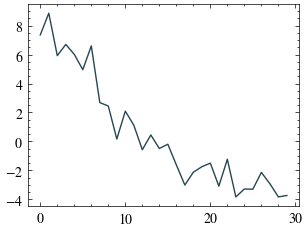

In [6]:
import matplotlib.pyplot as plt
plt.plot(energies)

In [7]:
ham.build(use_numpy=True)
ham.diagonalize()
ham.eig_val

16_03_2025_19-43_39 [INFO] 			->[Quantum Sun Model] JAX is available but NumPy is forced...


array([-4.27949615, -4.14645406, -3.78872315, ...,  4.02838523,
        4.24194772,  4.46954865])

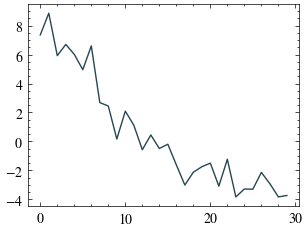

In [9]:
plt.plot(energies)
# plt.axhline(energies[0])
